## This notebook provides the information tracjectory during the course of training by vanilla SGD

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import pdb
import os

from src.models import MLP
from src.dataset import load_data
from src.pib_utils import train
from src.utils import train_track_info, plot_info_acc, plot_info
from src.utils import img_preprocess, setup_seed, predict, eval_metric, feature_map_size

use_gpu = True if torch.cuda.is_available() else False
__fig_dir__ = './figure'
if not os.path.exists(__fig_dir__):
    os.makedirs(__fig_dir__)

## Load data and set environment

In [2]:
__data_set__ = 'mnist'
__layers__ = [512,]
x_tr, y_tr, x_va, y_va, x_te, y_te = load_data(__data_set__)
all_tr_idx = np.arange(len(x_tr))
num_class = np.unique(y_va).shape[0]
x_tr, y_tr = img_preprocess(x_tr, y_tr, use_gpu)
x_va, y_va = img_preprocess(x_va, y_va, use_gpu)
x_te, y_te = img_preprocess(x_te, y_te, use_gpu)
setup_seed(2020)

load from MNIST
Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


D:\PAC-Bayes IB\PAC-Bayes-IB\src\utils.py:23: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  y = torch.LongTensor(y)


## train vanilla SGD with different activations

##############################
linear activation
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.55it/s]


initialize model weights.
done get prior weights
finish training and tracking


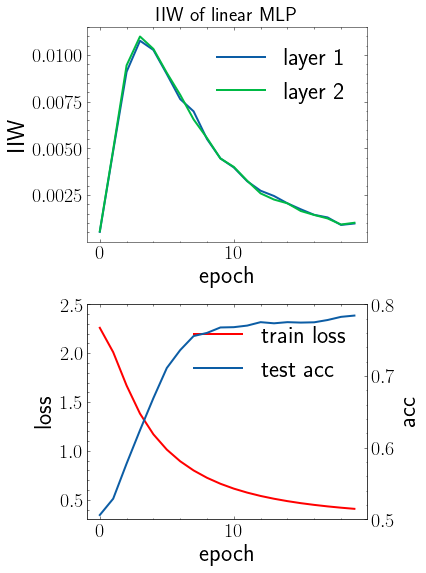

In [3]:
print('###'*10)
print('linear activation')
print('###'*10)

model = MLP(num_class, 'linear', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=20,
                                            batch_size=128, 
                                            lr=1e-4,
                                            weight_decay=0,
                                            track_info_per_iter=-1,
                                            verbose=False,)
print("finish training and tracking")
plot_info_acc(info_dict, loss_acc_list, 'linear', __fig_dir__)

##############################
relu activation
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.52it/s]


initialize model weights.
done get prior weights
finish training and tracking


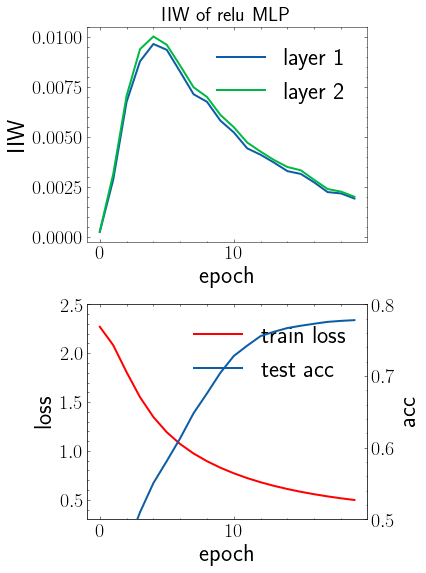

In [4]:
print('###'*10)
print('relu activation')
print('###'*10)

model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=20, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=-1,
                                            verbose=False,)
print("finish training and tracking")
plot_info_acc(info_dict, loss_acc_list, 'relu', __fig_dir__)

##############################
tanh activation
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.23it/s]


initialize model weights.
done get prior weights
finish training and tracking


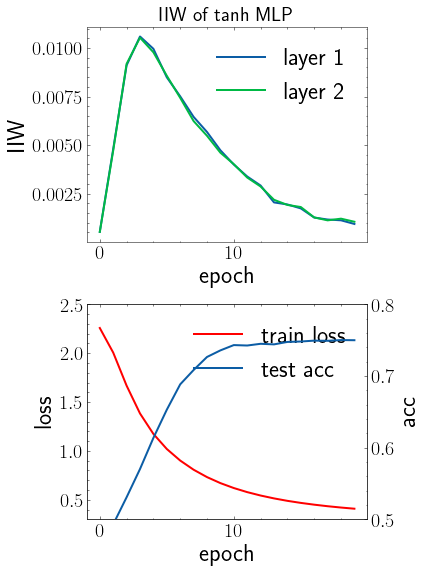

In [5]:
print('###'*10)
print('tanh activation')
print('###'*10)

model = MLP(num_class, 'tanh', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=20, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=-1,
                                            verbose=False,)
print("finish training and tracking")
plot_info_acc(info_dict, loss_acc_list, 'tanh', __fig_dir__)

##############################
sigmoid activation
##############################


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.79it/s]


initialize model weights.
done get prior weights
finish training and tracking


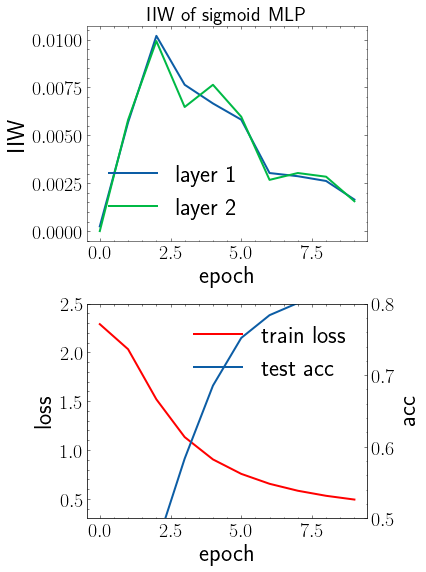

In [6]:
print('###'*10)
print('sigmoid activation')
print('###'*10)

model = MLP(num_class, 'sigmoid', layers=__layers__, dropout=0.0)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128,
                                            lr=1e-3,
                                            weight_decay=0,
                                            track_info_per_iter=-1,
                                            verbose=False,)
print("finish training and tracking")
plot_info_acc(info_dict, loss_acc_list, 'sigmoid', __fig_dir__)

## Start training by vanilla SGD and track the information

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 23.92it/s]


initialize model weights.
done get prior weights
finish training and tracking


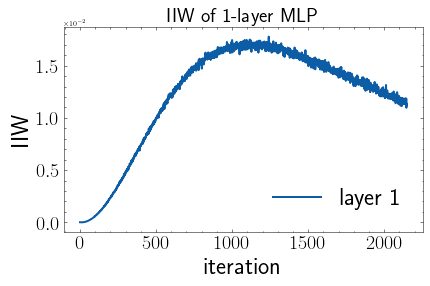

In [7]:
__layers__ = []
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=50, 
                                            batch_size=128, 
                                            lr=1e-3, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=False,)
print("finish training and tracking")
plot_info(info_dict, __fig_dir__)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.92it/s]


initialize model weights.
done get prior weights
finish training and tracking


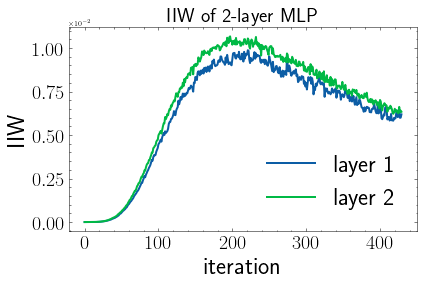

In [9]:
__layers__ = [512,]
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=False,)
print("finish training and tracking")
plot_info(info_dict, __fig_dir__)

## A clear phase transition happens during the whole training period.

## How about when we set layers to be three?

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.58it/s]


initialize model weights.
done get prior weights
finish training and tracking


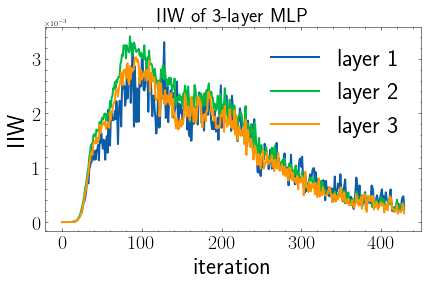

In [10]:
__layers__ = [512, 100,]
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=False,)
print("finish training and tracking")
plot_info(info_dict, __fig_dir__)

## We still observe the fitting-compressing phase transition. But it can be found the fitting goes faster than the two-layer model.

## How about when we set layers to be four?

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.63it/s]


initialize model weights.
done get prior weights
finish training and tracking


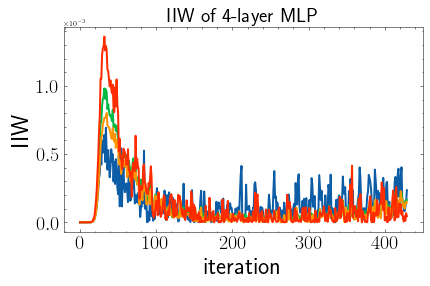

In [11]:
__layers__ = [512, 100, 80]
model = MLP(num_class, 'relu', layers=__layers__)
if use_gpu:
    model.cuda()
model.use_gpu = use_gpu

# get prior on the validation set
train(model, np.arange(len(y_va)), x_va, y_va, x_va, y_va, num_epoch=10, batch_size=128, lr=1e-3, weight_decay=1e-5, early_stop_ckpt_path="./checkpoints/mlp_prior.pth",verbose=False)
w0_dict = dict()
for param in model.named_parameters():
    w0_dict[param[0]] = param[1].clone().detach() # detach but still on gpu
model.w0_dict = w0_dict
model._initialize_weights()
print("done get prior weights")

info_dict, loss_acc_list = train_track_info(model, all_tr_idx, x_tr, y_tr, x_va, y_va, 
                                            num_epoch=10, 
                                            batch_size=128, 
                                            lr=1e-4, 
                                            weight_decay=0,
                                            track_info_per_iter=10,
                                            verbose=False,)
print("finish training and tracking")
plot_info(info_dict, __fig_dir__, use_legend=False)

## Fitting happens even faster, therefore it seems that overfitting happens near the end of training.